**Project Akhir**

Mata Kuliah: *Predictive Analytics*

Dosen :  Ika Nurlaili Isnainiyah, S.Kom.,
M.Sc.

Anggota Kelompok:
- 2010512107 Vincentius Ludwig
- 2010512122 Zahran Irfansyah
- 2010512127 Hanifa Widya Damayanti

**Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_excel("drive/My Drive/Colab Data/data_retail.xlsx")
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [ ]:
df = df.drop(['no', 'Row_Num', 'Customer_ID'] ,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product                     100000 non-null  object
 1   First_Transaction           100000 non-null  int64 
 2   Last_Transaction            100000 non-null  int64 
 3   Average_Transaction_Amount  100000 non-null  int64 
 4   Count_Transaction           100000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'],unit='ms')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'],unit='ms')
df.head()

,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22
1,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41
2,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30
3,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27
4,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25


In [ ]:
df.sort_values(by='Last_Transaction')

,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
29588,Sepatu,2013-03-08 07:53:46.297,2013-03-08 07:53:46.297,8892083,1
46452,Sepatu,2013-03-11 04:48:32.304,2013-03-11 04:48:32.304,3142403,1
68535,Sepatu,2013-03-14 05:20:14.506,2013-03-14 05:20:14.506,1995735,1
56435,Sepatu,2013-03-27 09:10:58.878,2013-03-27 09:10:58.878,2002187,1
22461,Sepatu,2013-04-16 09:23:37.329,2013-04-16 09:23:37.329,1630183,1
...,...,...,...,...,...
16531,Sepatu,2016-04-14 15:36:32.029,2019-02-01 23:43:04.189,1287681,71
2006,Sepatu,2015-06-14 12:43:28.524,2019-02-01 23:46:22.525,1720625,143
1055,Tas,2017-07-25 03:06:28.000,2019-02-01 23:53:21.000,413398,50
18198,Jaket,2015-05-11 06:55:37.831,2019-02-01 23:57:53.571,1059131,34


In [ ]:
import datetime

# create a function
def unix_stamp(date):
    return  datetime.datetime.strptime(date,"%Y-%m-%d")

def churn(last_trx):
    if last_trx <= unix_stamp('2018-08-02'):
        return False
    else:
        return True
# create a new column based on condition
df['Churn'] = df['Last_Transaction'].apply(churn)
# display the dataframe
df.head()

,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn
0,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,True
1,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,True
2,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,True
3,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,True
4,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,True


In [ ]:
df.sort_values(by='Last_Transaction')

,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn
29588,Sepatu,2013-03-08 07:53:46.297,2013-03-08 07:53:46.297,8892083,1,False
46452,Sepatu,2013-03-11 04:48:32.304,2013-03-11 04:48:32.304,3142403,1,False
68535,Sepatu,2013-03-14 05:20:14.506,2013-03-14 05:20:14.506,1995735,1,False
56435,Sepatu,2013-03-27 09:10:58.878,2013-03-27 09:10:58.878,2002187,1,False
22461,Sepatu,2013-04-16 09:23:37.329,2013-04-16 09:23:37.329,1630183,1,False
...,...,...,...,...,...,...
16531,Sepatu,2016-04-14 15:36:32.029,2019-02-01 23:43:04.189,1287681,71,True
2006,Sepatu,2015-06-14 12:43:28.524,2019-02-01 23:46:22.525,1720625,143,True
1055,Tas,2017-07-25 03:06:28.000,2019-02-01 23:53:21.000,413398,50,True
18198,Jaket,2015-05-11 06:55:37.831,2019-02-01 23:57:53.571,1059131,34,True


**EDA**

In [ ]:
import numpy as np

# Separating Categorical and Numerical Data for Easy Analysis
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

print('Categorical Variables: ', cat_cols)
print('Numerical Variables: ', num_cols)

Categorical Variables:  Index(['Product'], dtype='object')
Numerical Variables:  ['Average_Transaction_Amount', 'Count_Transaction']


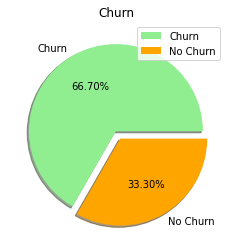

In [ ]:
import matplotlib.pyplot as plt
# Pie Chart for Categorical Data

labels = ['Churn', 'No Churn']
size = df['Churn'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Churn')
plt.axis('off')
plt.legend()
plt.show()

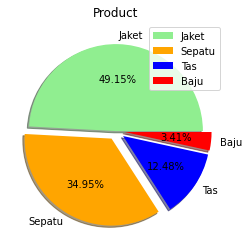

In [ ]:
labels = ['Jaket', 'Sepatu', 'Tas', 'Baju']
size = df['Product'].value_counts()
colors = ['lightgreen', 'orange', 'blue', 'red']
explode = [0, 0.1, 0.1, 0.1]
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Product')
plt.axis('off')
plt.legend()
plt.show()

Average_Transaction_Amount
Skew : 4.24


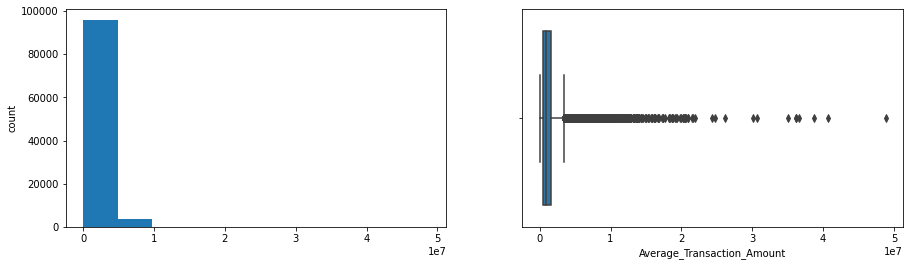

Count_Transaction
Skew : 33.91


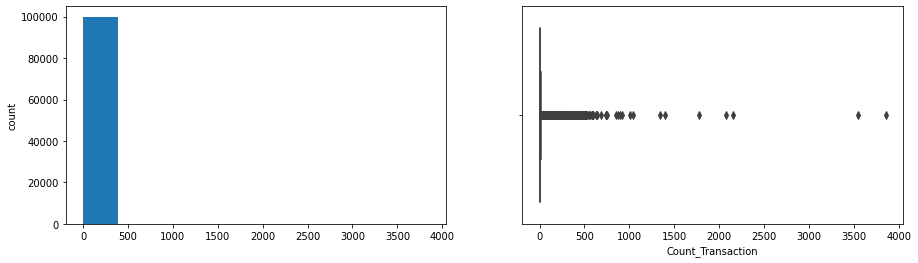

In [ ]:
import seaborn as sns

# Histogram and Box Plot for Numerical Data
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

False    66701
True     33299
Name: Churn, dtype: int64


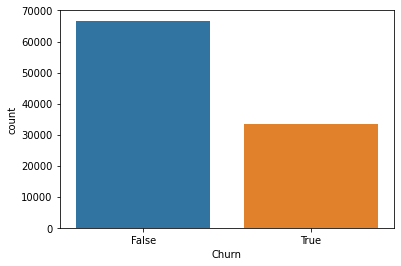

In [ ]:
sns.countplot(x='Churn', data=df)
print(df['Churn'].value_counts())

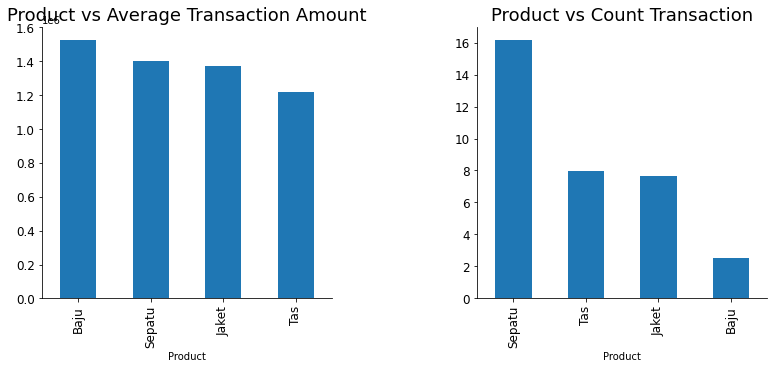

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
df.groupby('Product')['Average_Transaction_Amount'].mean().sort_values(ascending=False).plot.bar(ax=axes[0], fontsize=12)
axes[0].set_title("Product vs Average Transaction Amount", fontsize=18)
df.groupby('Product')['Count_Transaction'].mean().sort_values(ascending=False).plot.bar(ax=axes[1], fontsize=12)
axes[1].set_title("Product vs Count Transaction", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

**Data Preprocessing**

In [ ]:
# To See If There Are Missing or Duplicated Values in A Column
missing_data = df.isnull().sum()
duplicate_data = df.duplicated().sum()

print(missing_data)
print(duplicate_data)

Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
Churn                         0
dtype: int64
69


**Model Exploration**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

for column in df.columns :
  if df[column].dtype == np.number: continue
  df[column] = LabelEncoder().fit_transform(df[column])

x = df.drop('Churn', axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression().fit(x_train, y_train)

<ipython-input-38-0fcf1ed269f7>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue


In [ ]:
from sklearn.metrics import classification_report

y_train_pred = model.predict(x_train)

print('Classification Report:\n')
print(classification_report(y_train, y_train_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     53419
           1       0.77      0.79      0.78     26581

    accuracy                           0.85     80000
   macro avg       0.83      0.84      0.83     80000
weighted avg       0.85      0.85      0.85     80000



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[47119,  6300],
       [ 5634, 20947]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf_model = RandomForestClassifier().fit(x_train, y_train)

y_train_pred = rdf_model.predict(x_train)

print('Classification Report:\n')
print(classification_report(y_train, y_train_pred))

confusion_matrix(y_train, y_train_pred)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53419
           1       1.00      1.00      1.00     26581

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



array([[53419,     0],
       [    0, 26581]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grb_model = GradientBoostingClassifier().fit(x_train, y_train)

y_train_pred = grb_model.predict(x_train)

print('Classification Report:\n')
print(classification_report(y_train, y_train_pred))

confusion_matrix(y_train, y_train_pred)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53419
           1       1.00      1.00      1.00     26581

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



array([[53419,     0],
       [    0, 26581]])